Source de donnees : https://www.kaggle.com/arjunbhasin2013/ccdata

### IMPORTER DES BIBLIOTHÈQUES ET DES JEUX DE DONNÉES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
# CUSTID : Identification du titulaire de la carte de crédit
# SOLDE : montant du solde restant sur le compte du client pour effectuer des achats
# BALANCE_FREQUENCY : fréquence de mise à jour du solde, score compris entre 0 et 1 (1 = fréquemment mis à jour, 0 = pas fréquemment mis à jour)
# ACHATS : montant des achats effectués depuis le compte
# ONEOFFPURCHASES: Montant maximum d'achat effectué en une seule fois
# INSTALLMENTS_PURCHASES : montant de l'achat effectué en plusieurs fois
# CASH_ADVANCE : Paiement d'avance donné par l'utilisateur
# PURCHASES_FREQUENCY : la fréquence à laquelle les achats sont effectués, score compris entre 0 et 1 (1 = fréquemment acheté, 0 = peu fréquemment acheté)
# ONEOFF_PURCHASES_FREQUENCY : la fréquence à laquelle les achats sont effectués en une seule fois (1 = fréquemment achetés, 0 = rarement achetés)
# PURCHASES_INSTALLMENTS_FREQUENCY : la fréquence des achats en plusieurs fois (1 = fréquemment effectués, 0 = peu fréquents)
# CASH_ADVANCE_FREQUENCY : la fréquence à laquelle l'avance en espèces est payée
# CASH_ADVANCE_TRX : nombre de transactions effectuées avec "Cash en avance"
# PURCHASES_TRX : nombre de transactions d'achat effectuées
# CREDIT_LIMIT : limite de carte de crédit pour l'utilisateur
# PAIEMENTS : Montant du paiement effectué par l'utilisateur
# MINIMUM_PAYMENTS : montant minimum des paiements effectués par l'utilisateur
# PRC_FULL_PAYMENT : Pourcentage du paiement total payé par l'utilisateur
# TENURE : Durée du service de carte de crédit pour l'utilisateur

In [71]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [73]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
creditcard_df.info()
creditcard_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Le solde moyen est de 1564 $
# La fréquence d'équilibrage est fréquemment mise à jour en moyenne ~0,9
# La moyenne des achats est de 1 000 $
# la moyenne d'un achat unique est d'environ 600 $
# La fréquence moyenne d'achat est d'environ 0,5
# les moyennes ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY et CASH_ADVANCE_FREQUENCY sont généralement faibles
# Limite de crédit moyenne ~ 4500
# Le pourcentage du paiement intégral est de 15 %
# L'ancienneté moyenne est de 11 ans

In [9]:
# Voyons qui a fait un achat de 40761 $ !

creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [10]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [11]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [12]:
# Voyons qui a fait une avance de fonds de 47137 $ !
# Ce client a effectué 123 transactions d'avance de fonds !!
# Jamais payé la totalité de la carte de crédit

In [13]:
creditcard_df[creditcard_df['CASH_ADVANCE'] ==47137.21176 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### VISUALISER ET EXPLORER LE JEU DE DONNÉES

<AxesSubplot: >

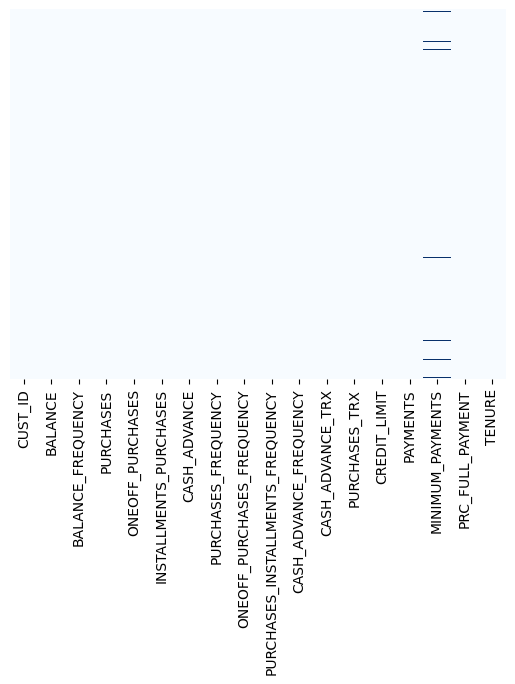

In [14]:
# Voyons si nous avons des données manquantes, heureusement que nous n'en avons pas !

sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [15]:
# Numbre de valeurs manquantes
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [23]:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [31]:
len(creditcard_df['CREDIT_LIMIT'].isnull())

8950

In [29]:
# Remplacer les éléments manquants avec la moyenne du 'MINIMUM_PAYMENT'

creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()



In [32]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [33]:
# Remplacer les éléments manquants avec la moyenne du 'CREDIT_LIMIT'

creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [34]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot: >

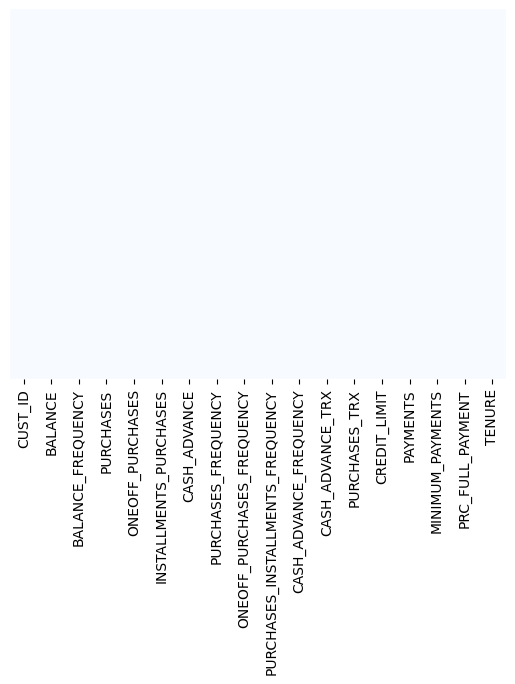

In [36]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [38]:
# Voyons si nous avons des entrées dupliquees dans les données

creditcard_df.duplicated().sum()

0

In [74]:
# Supprimons CUST_ID car il n'a pas trop d'importance
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [43]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [45]:
# Nombre de colonnes

len(creditcard_df.columns)

17

In [46]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [49]:
creditcard_df.columns[1]

'BALANCE_FREQUENCY'

/var/folders/mw/yz61wp355js66413m1cxbhgr0000gn/T/ipykernel_10475/3465193227.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "r"})
/var/folders/mw/yz61wp355js66413m1cxbhgr0000gn/T/ipykernel_10475/3465193227.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
http

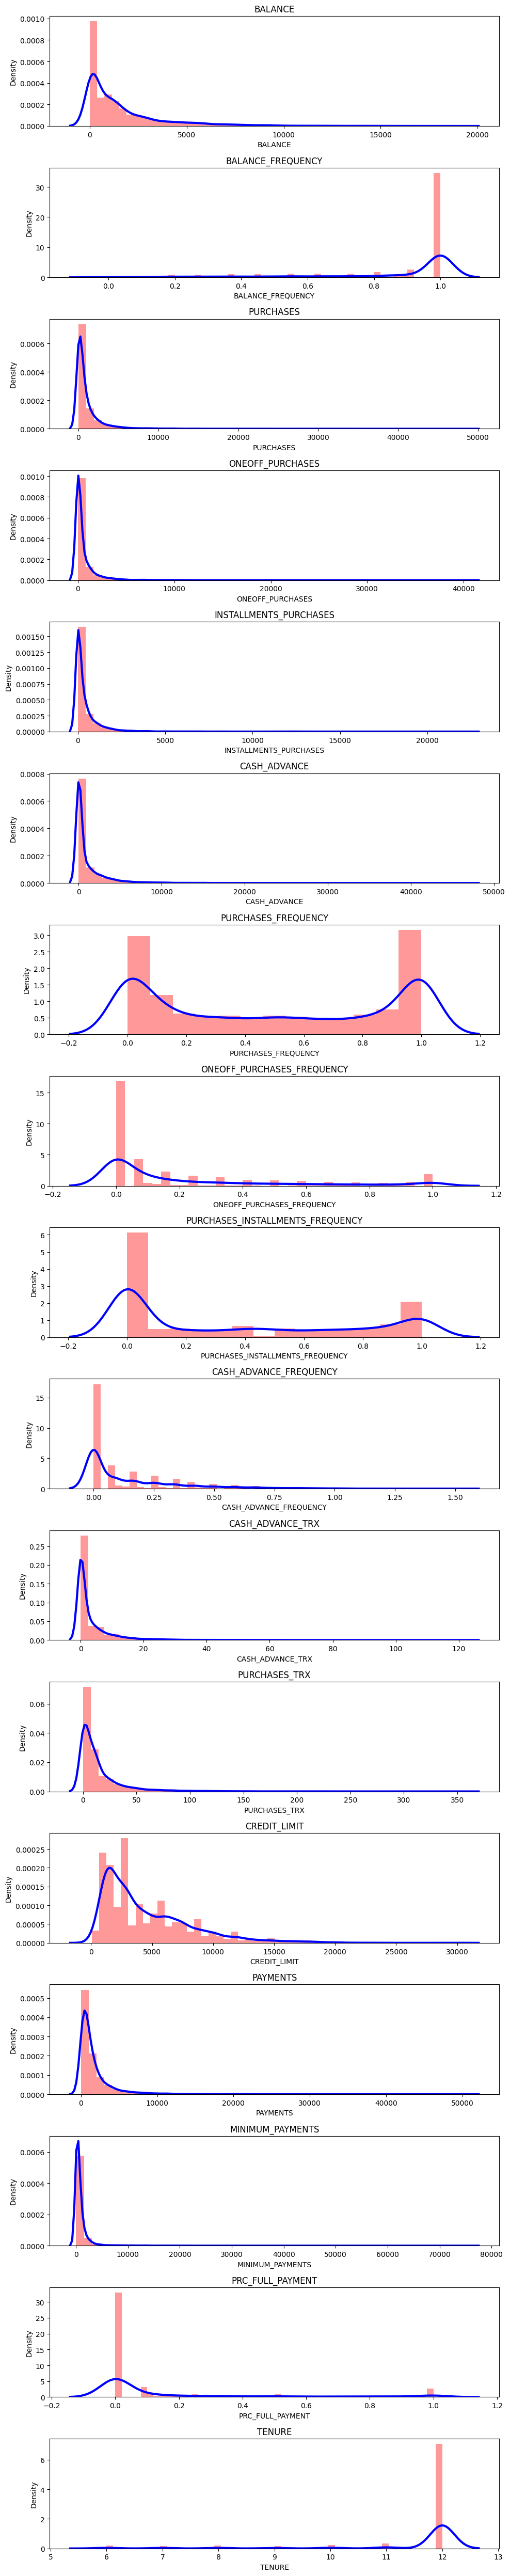

In [50]:
# distplot combine la fonction matplotlib.hist avec seaborn kdeplot()
# KDE Plot represente Kernel Density Estimate
# KDE est utilisé pour visualiser la densité de probabilité d'une variable continue. 
# KDE démontre la densité de probabilité à différentes valeurs dans une variable continue.
# La moyenne de balance est $1500
# 'Balance_Frequency' pour la plupart des clients est mis à jour fréquemment ~1
# Pour 'PURCHASES_FREQUENCY', il y a deux groupes de clients distincts
# Pour 'ONEOFF_PURCHASES_FREQUENCY' et 'PURCHASES_INSTALLMENT_FREQUENCY' la plupart des utilisateurs ne font pas fréquemment d'achats ponctuels ou d'achats échelonnés
# Très petit nombre de clients paient leur solde en totalité 'PRC_FULL_PAYMENT'~0
# La limite de crédit moyenne est d'environ $4500
# La plupart des clients ont environ 11 ans d'ancienneté

plt.figure(figsize=(10,50))

for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "r"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()


In [ ]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


In [52]:
# sns.pairplot(creditcard_df)
# Corrélation entre 'PURCHASES' et ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Tendance entre 'PURCHASES' et 'CREDIT_LIMIT' & 'PAYMENTS'


correlations = creditcard_df.corr()


<AxesSubplot: >

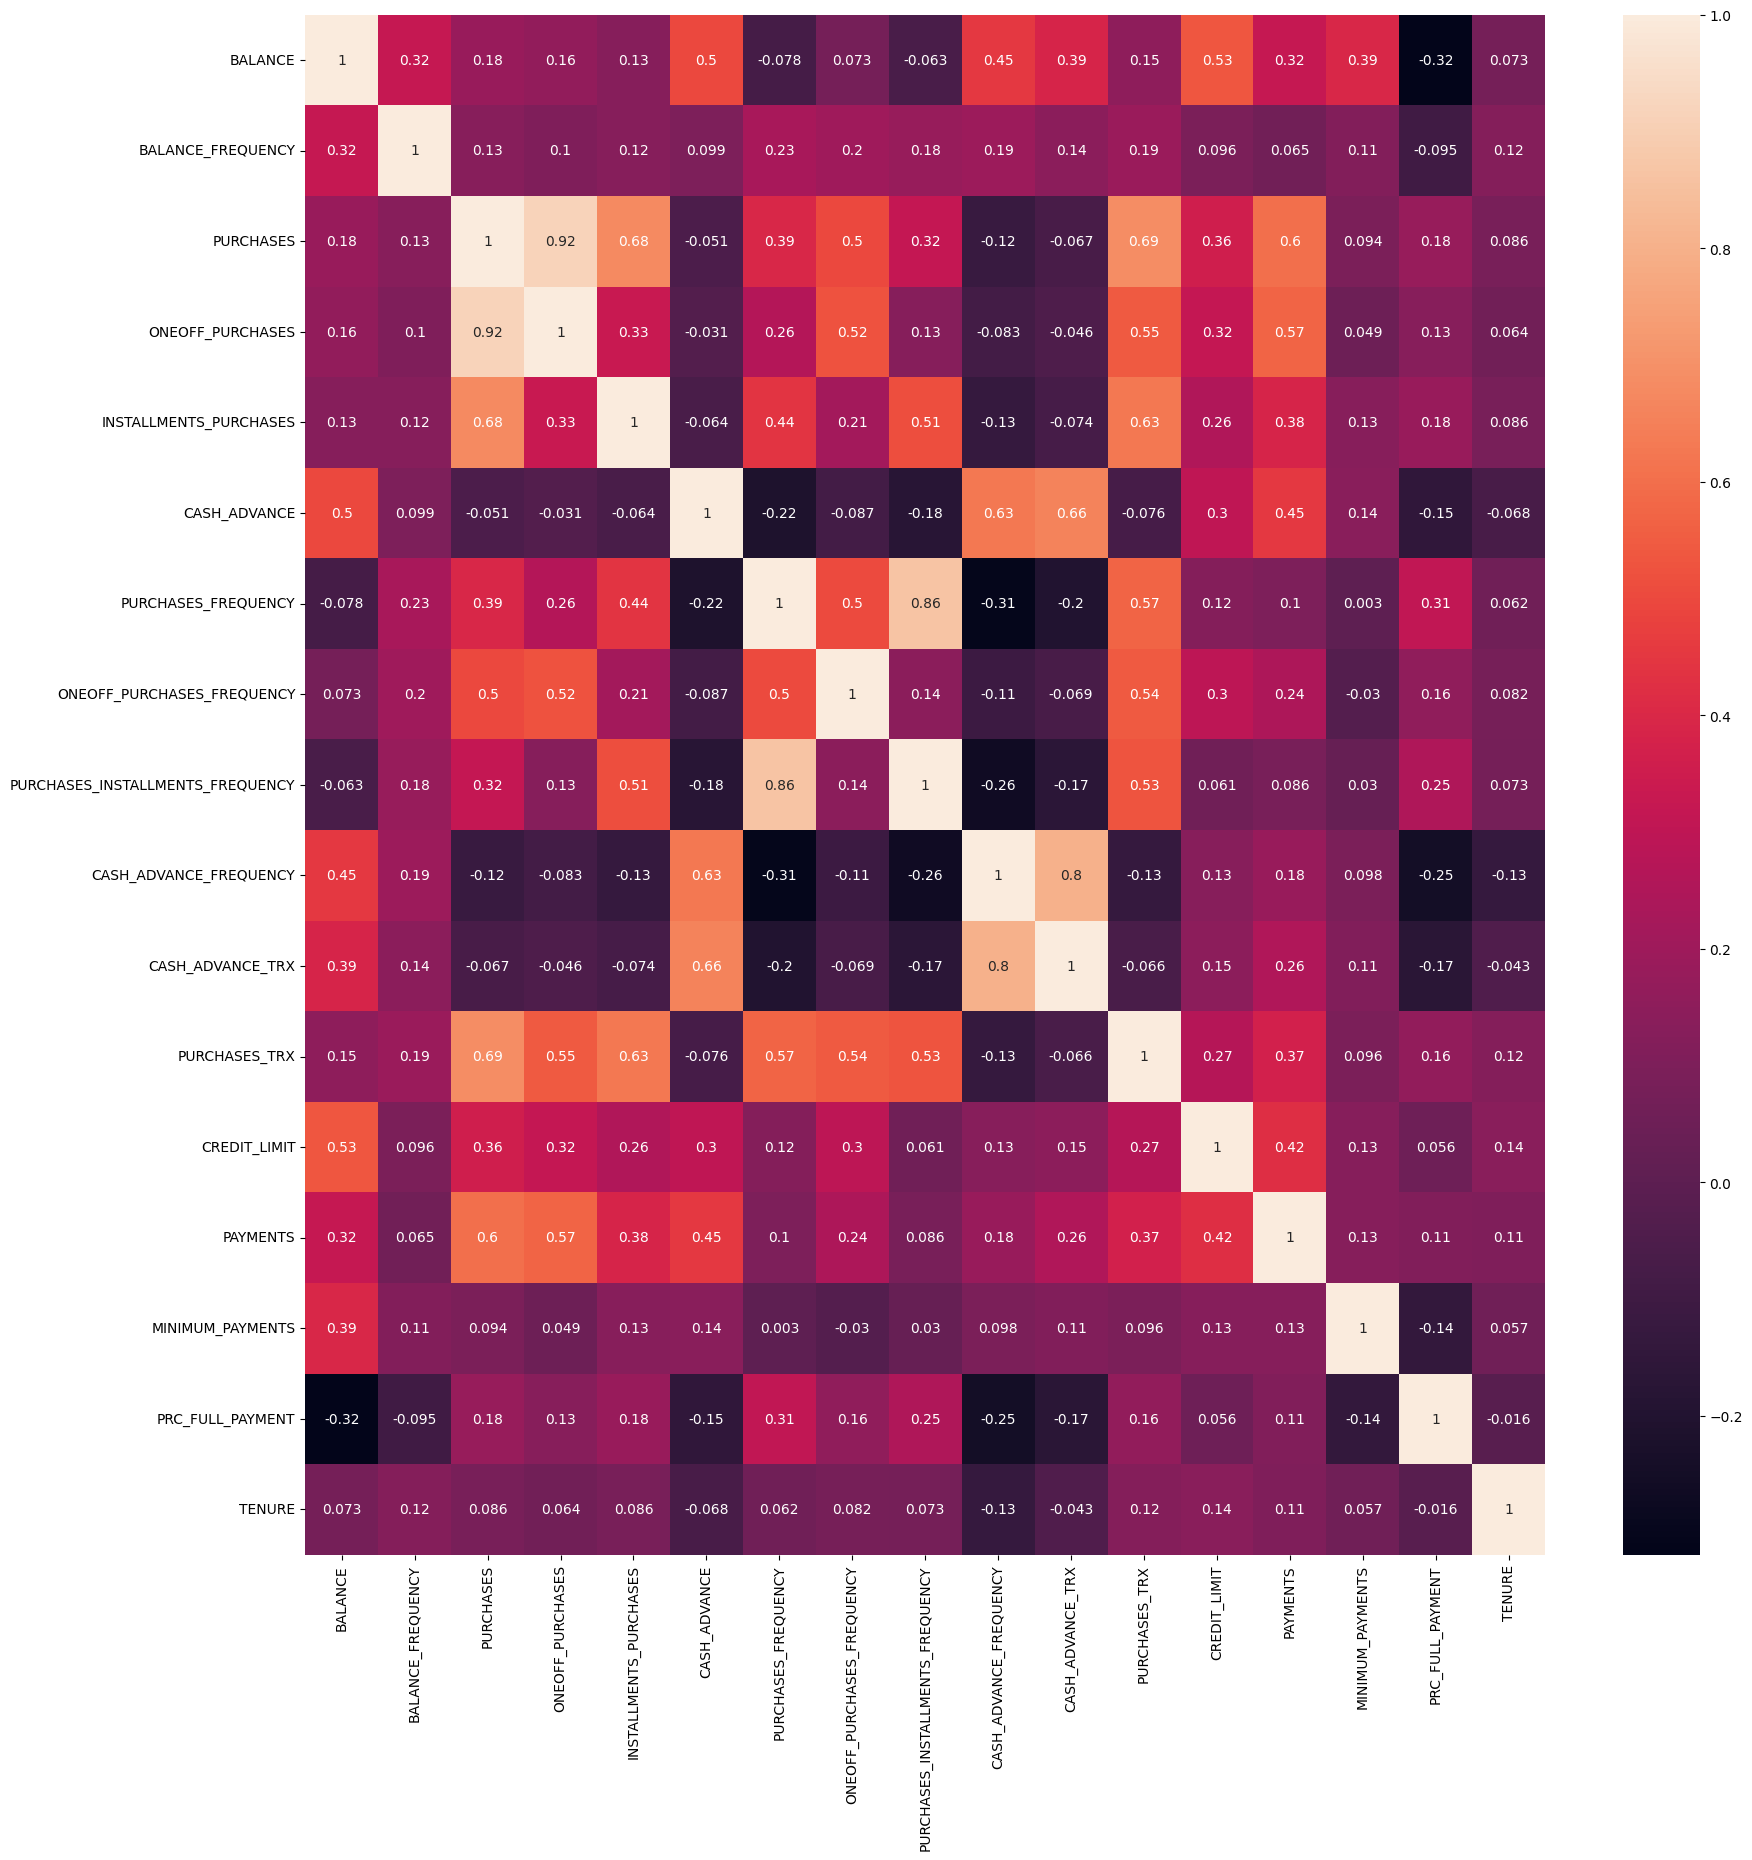

In [53]:
fig, ax = plt.subplots(figsize = (20, 20))

sns.heatmap(correlations, annot=True)


# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'




### COMPRENDRE LA THÉORIE ET ​​L'INTUITION DERRIÈRE K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

### TROUVEZ LE NOMBRE OPTIMAL DE CLUSTERS EN UTILISANT LA MÉTHODE CONNUE SOUS LE NOM "ELBOW METHOD"

In [65]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [66]:
creditcard_df_scaled.shape

(8950, 17)

In [67]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [102]:
score_1 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    score_1.append(kmeans.inertia_)

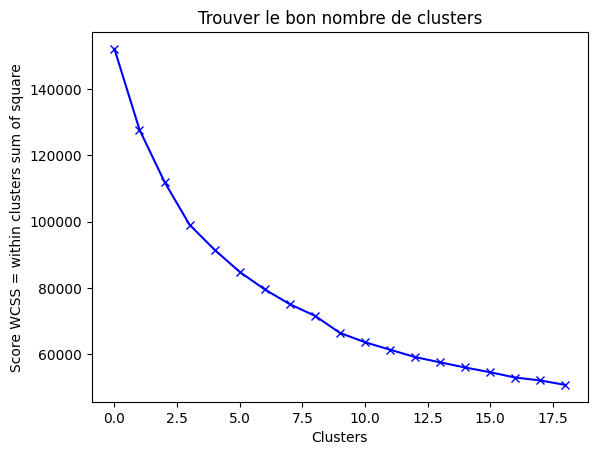

In [103]:
plt.plot(score_1, 'bx-')
plt.title('Trouver le bon nombre de clusters')
plt.xlabel('Clusters')
plt.ylabel('Score WCSS = within clusters sum of square')
plt.show()

# À partir de là, nous pouvons observer que le 4e cluster semble former le coude (Elbow method) de la courbe.
# Cependant, les valeurs ne diminuent pas de manière linéaire jusqu'au 8ème cluster.
# Choisissons le nombre de clusters à 7.

### APPLIQUER LA METHOD K-MEANS 

In [69]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [70]:
kmeans.cluster_centers_.shape

(8, 17)

In [75]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers                    

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.162601,0.392179,0.464655,0.606993,-0.016632,-0.332621,0.942818,1.878030,0.090361,-0.406452,-0.322632,0.529433,0.384113,0.094331,-0.162193,0.406784,0.261183
1,-0.701253,-2.141560,-0.311047,-0.235565,-0.302578,-0.322150,-0.555955,-0.443021,-0.440183,-0.521105,-0.376272,-0.419604,-0.177998,-0.202449,-0.256774,0.280448,0.199473
2,1.697017,0.392762,-0.216883,-0.155459,-0.227280,2.030839,-0.475027,-0.211362,-0.412621,1.929607,1.947921,-0.265397,1.037787,0.828099,0.515820,-0.392020,0.068925
3,-0.366541,0.333613,-0.038954,-0.244358,0.356637,-0.363772,0.988918,-0.386940,1.204105,-0.475444,-0.361371,0.186089,-0.261402,-0.218295,-0.046278,0.313708,0.257637
4,0.020351,0.404043,-0.362377,-0.247501,-0.402018,-0.086140,-0.869110,-0.411369,-0.760041,0.115907,-0.020450,-0.487562,-0.305510,-0.247916,-0.003229,-0.456436,0.272429
5,0.922183,0.467535,2.256660,1.722274,2.171760,-0.195314,1.160307,1.552162,1.245501,-0.313553,-0.211258,2.785144,1.225536,1.285330,0.567968,0.290267,0.333992
6,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In [76]:
# Afin de comprendre ce que signifient ces nombres, effectuons une transformation inverse

# Premier groupe de clients (transacteurs) : ce sont les clients qui paient le moins de frais d'intérêt et qui font attention à leur argent, groupe avec le solde le plus bas (104 $) et l'avance de fonds (303 $), pourcentage de paiement intégral = 23 %
# Deuxième groupe de clients (revolvers) qui utilisent une carte de crédit comme prêt (secteur le plus lucratif) : solde le plus élevé (5 000 $) et avance de fonds (~ 5 000 $), faible fréquence d'achat, fréquence élevée d'avances de fonds (0,5), opérations d'avance de fonds élevées ( 16) et faible pourcentage de paiement intégral (3 %)
# Troisième groupe de clients (VIP/Prime) : limite de crédit élevée de 16 000 $ et pourcentage le plus élevé de paiement intégral, objectif d'augmenter la limite de crédit et d'augmenter les habitudes de consommation
# Quatrième cluster de clients (faible ancienneté) : ce sont des clients avec une ancienneté faible (7 ans), un solde bas


In [77]:
labels.shape # Libellés associés à chaque point de données

(8950,)

In [78]:
labels.max()

7

In [79]:
labels.min()

0

In [80]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


array([3, 2, 7, ..., 4, 4, 4], dtype=int32)

In [81]:
# concaténer les étiquettes des clusters à notre dataframe d'origine

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


<function matplotlib.pyplot.show(close=None, block=None)>

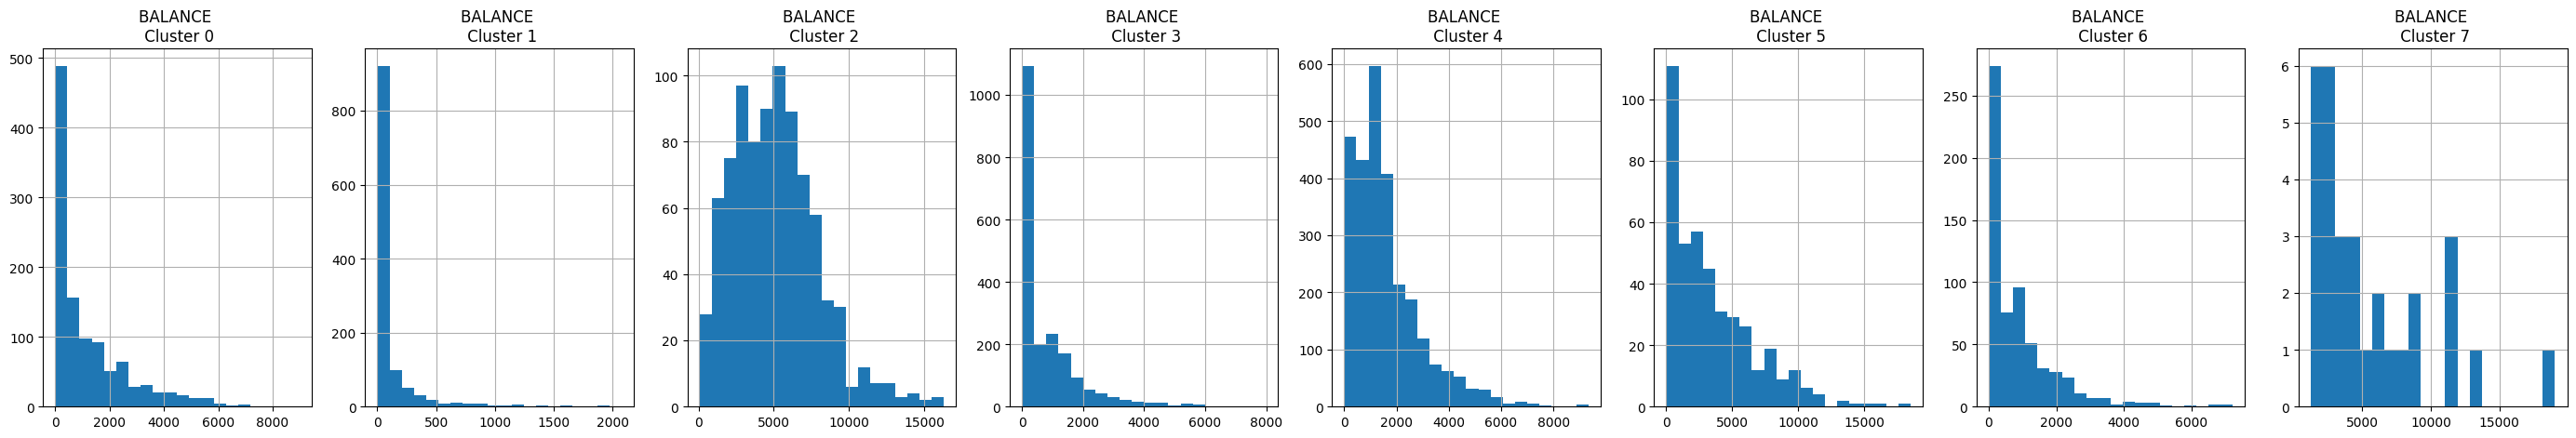

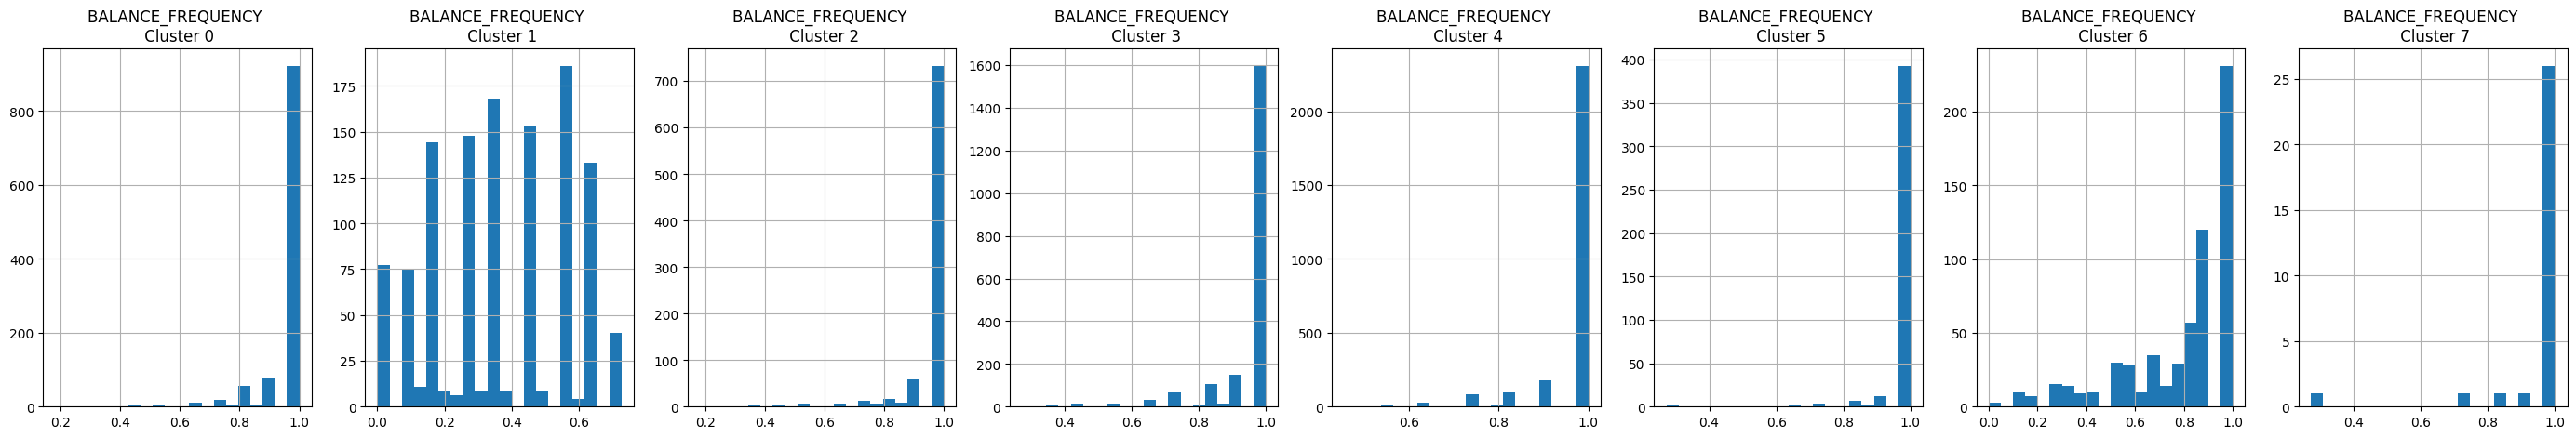

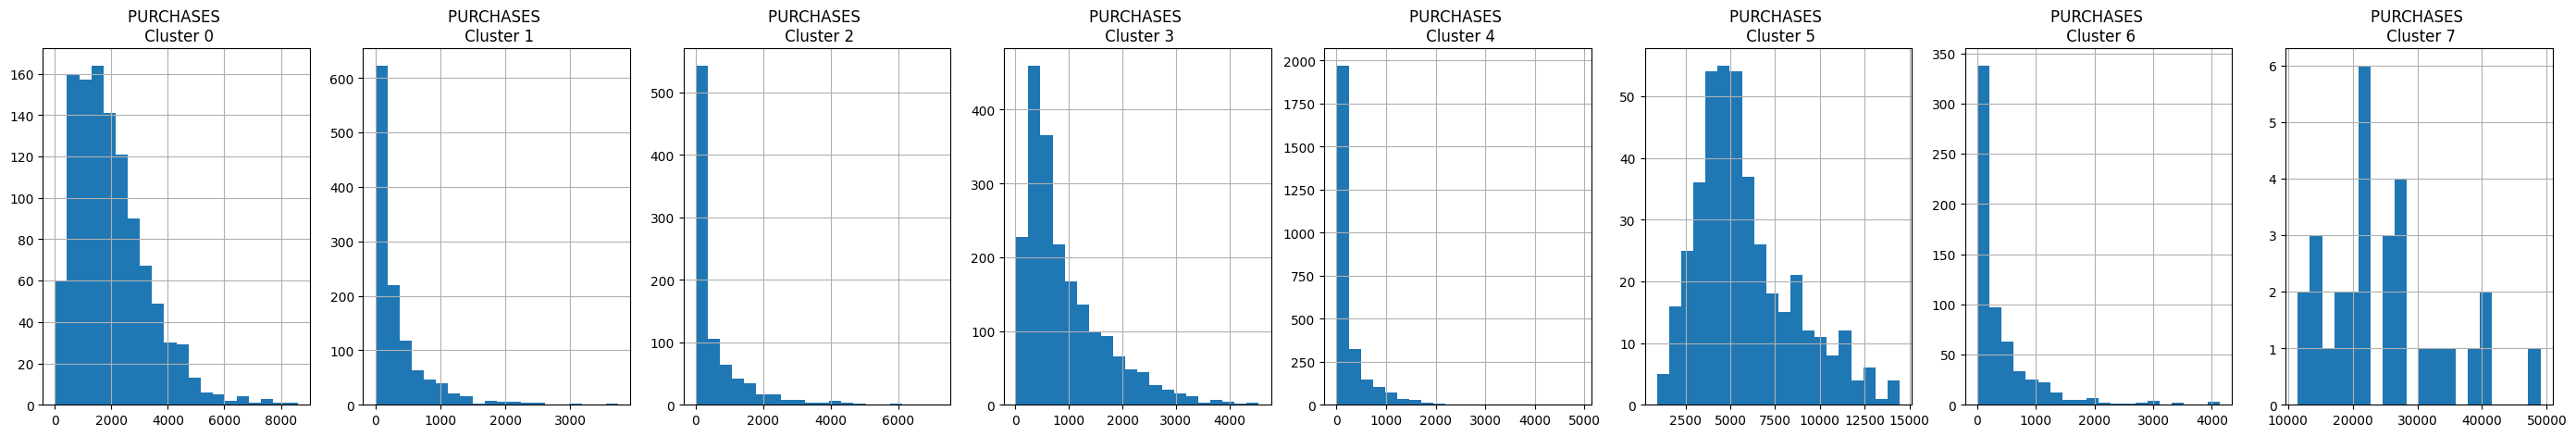

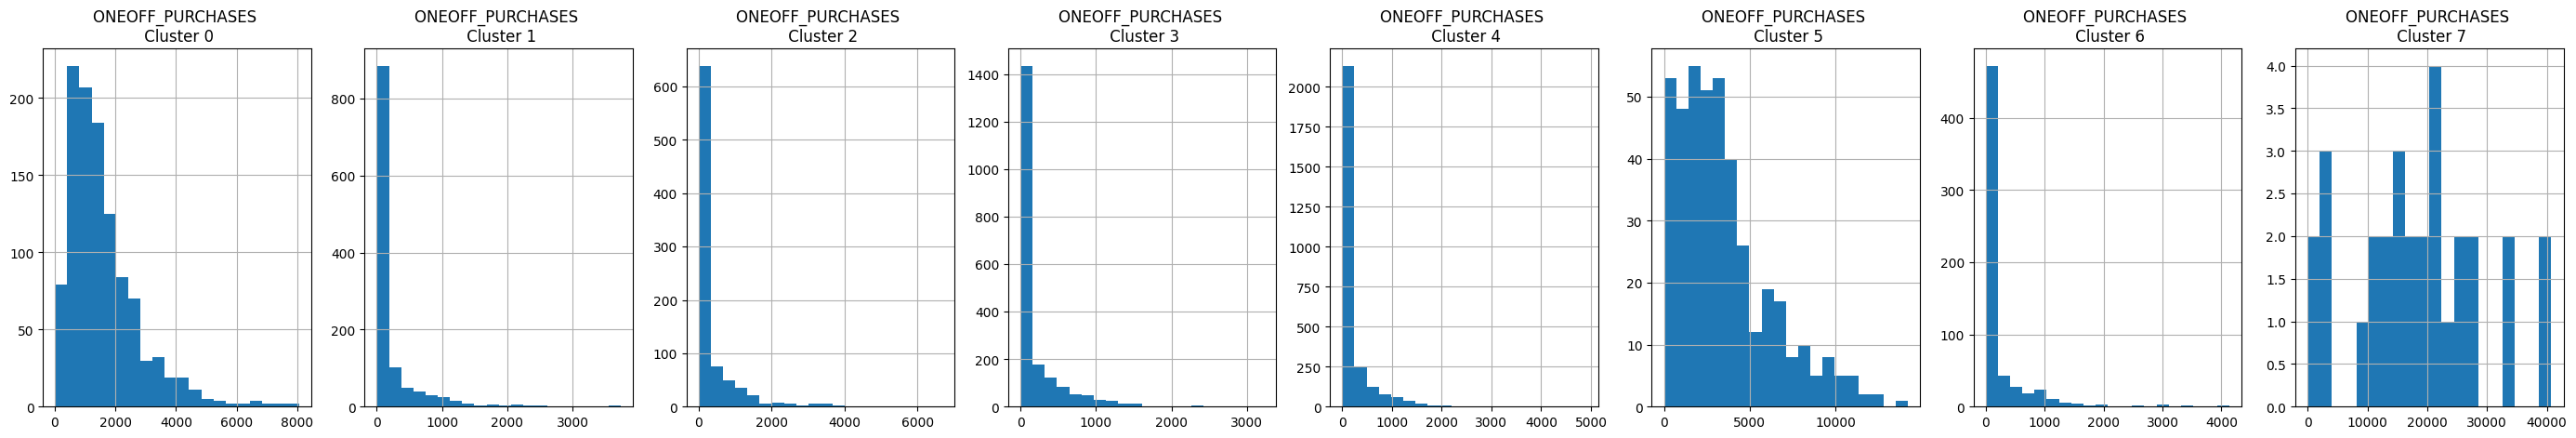

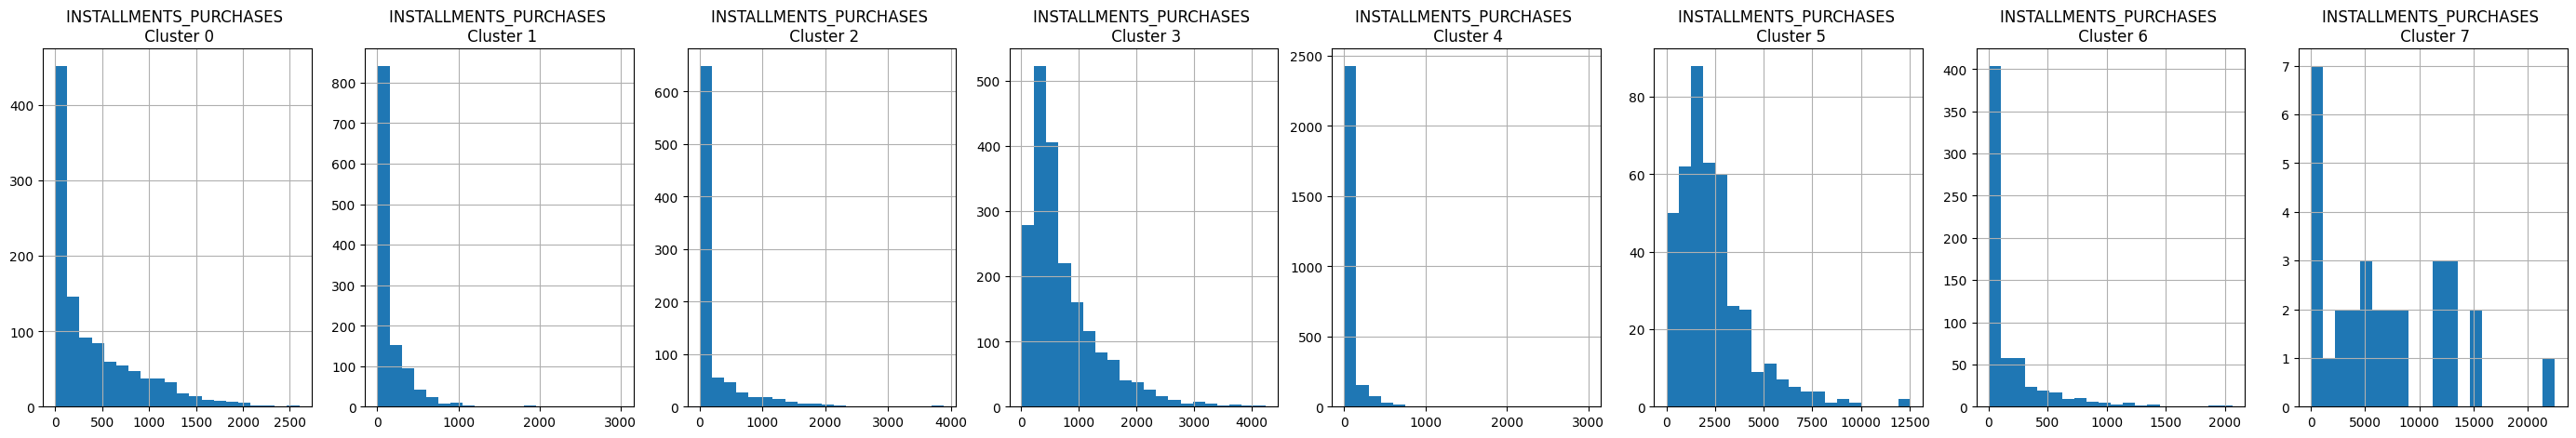

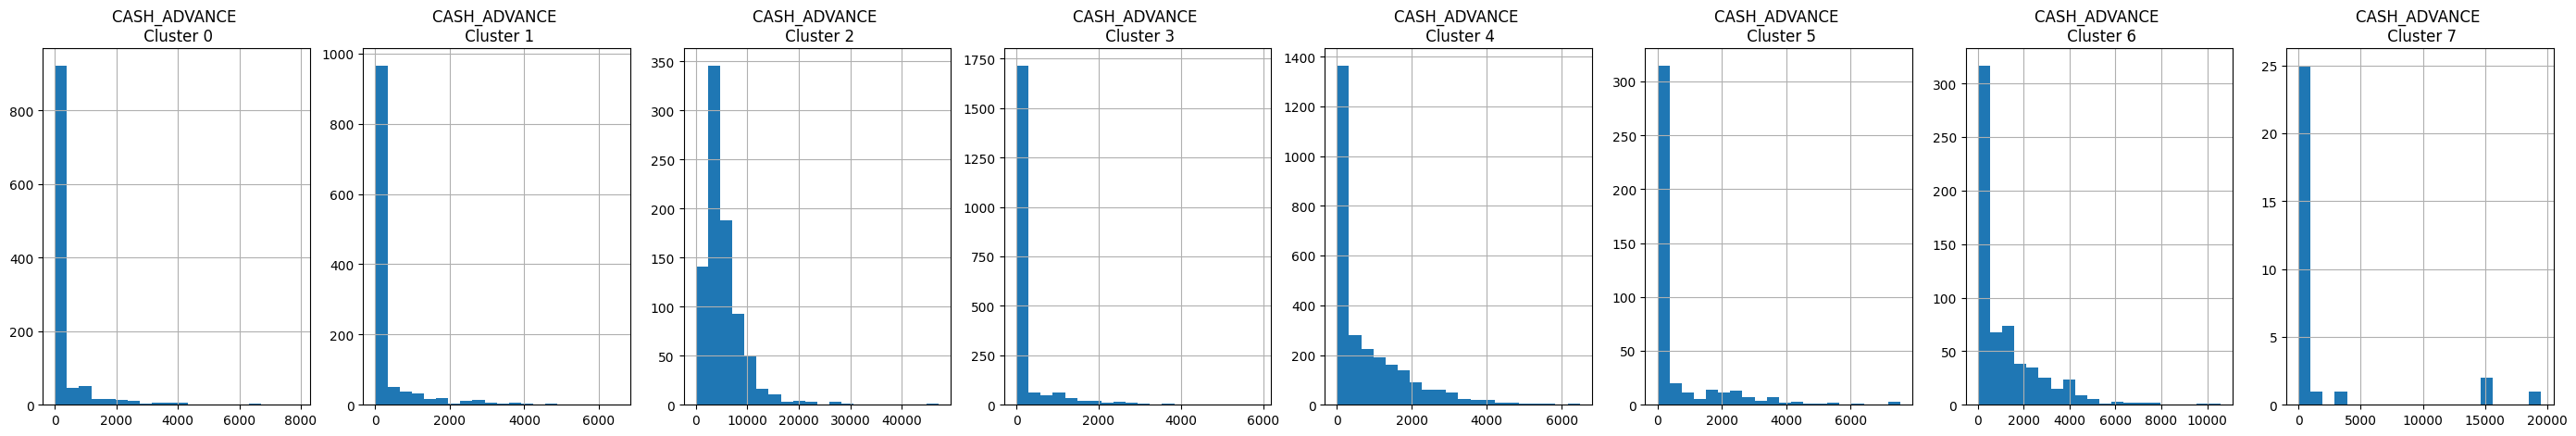

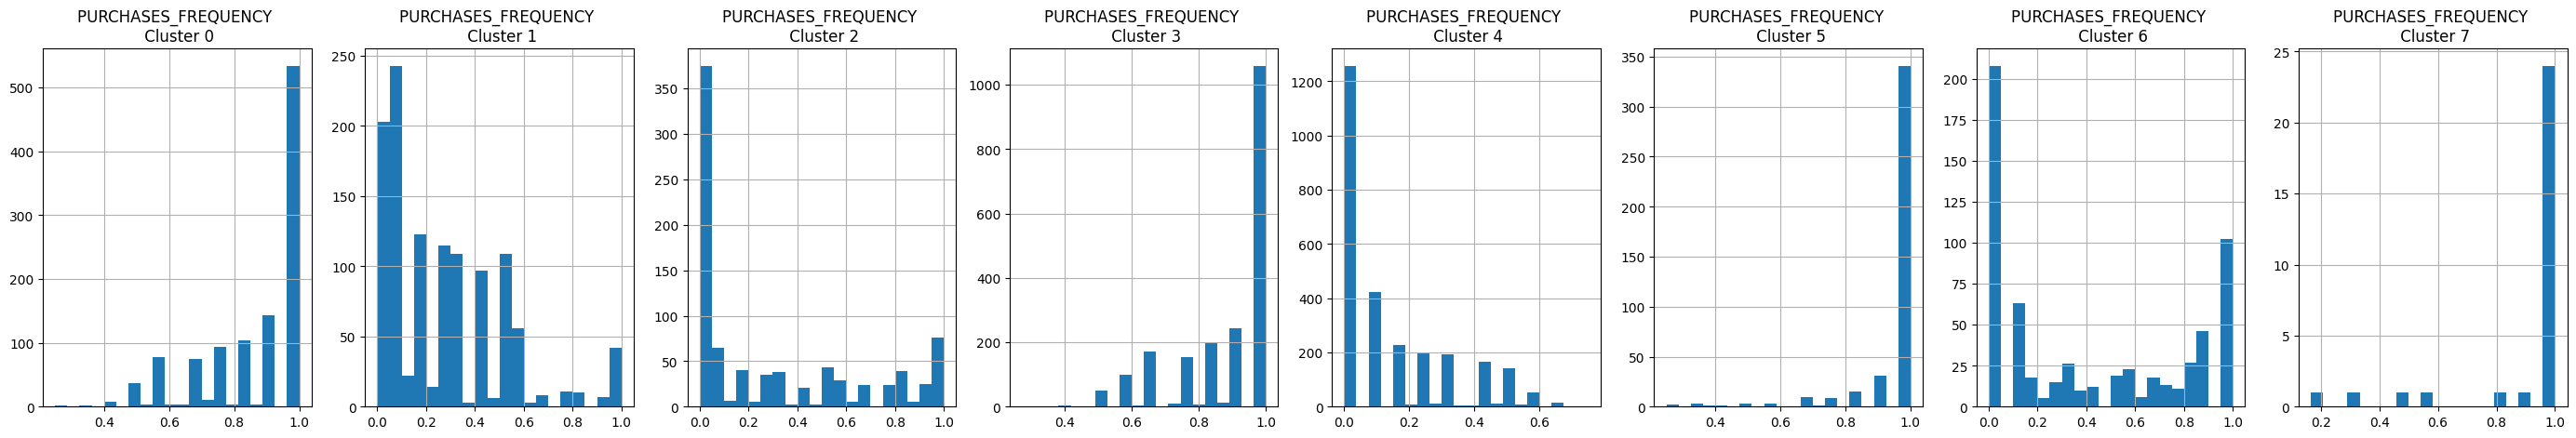

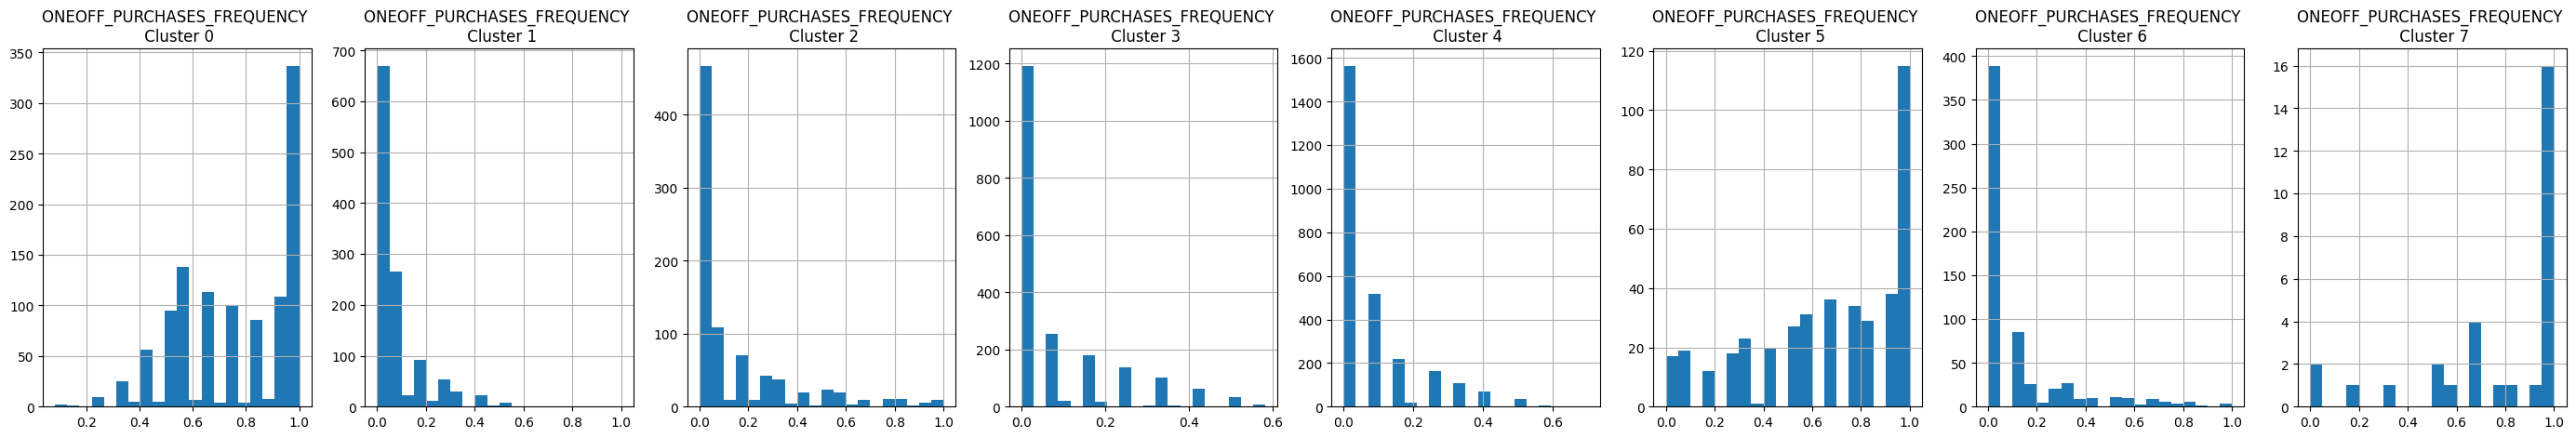

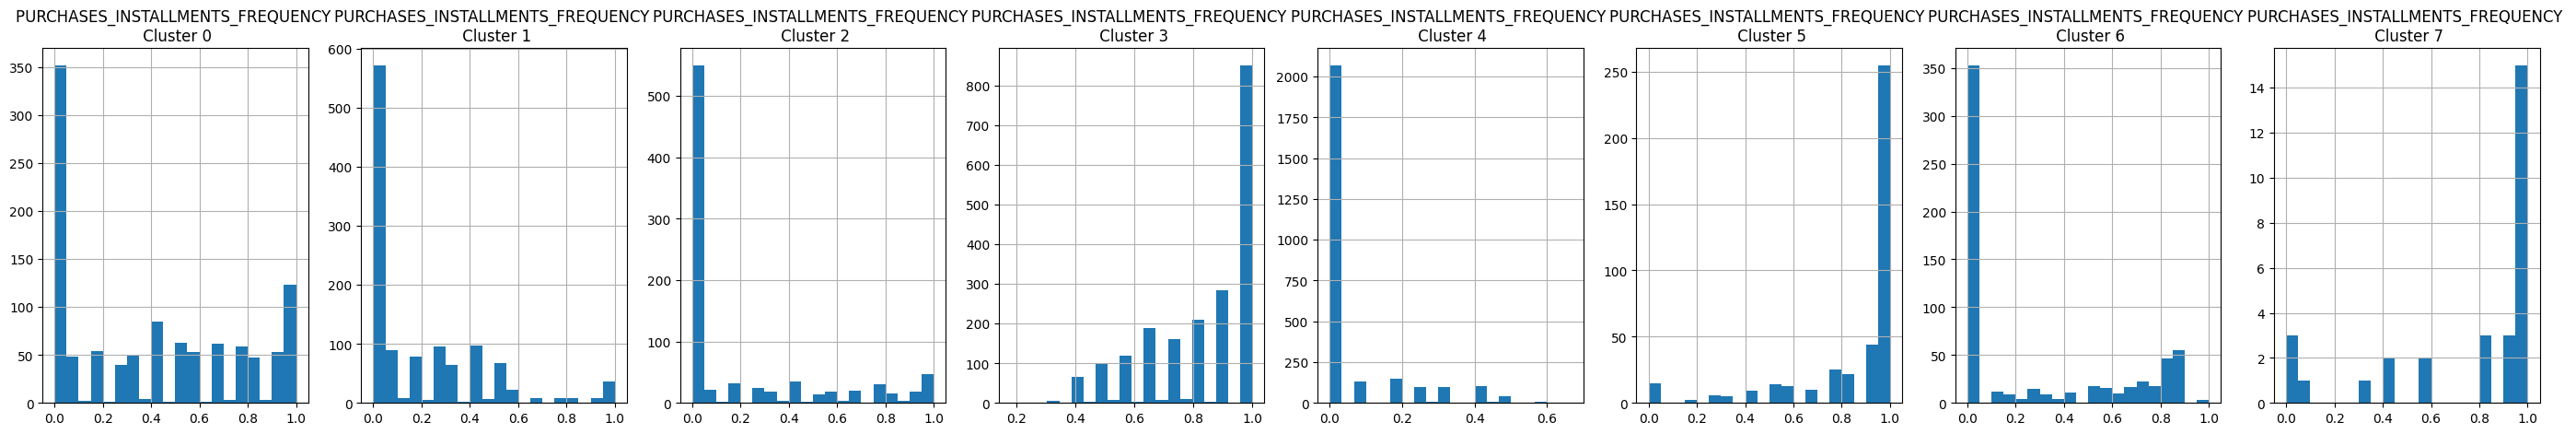

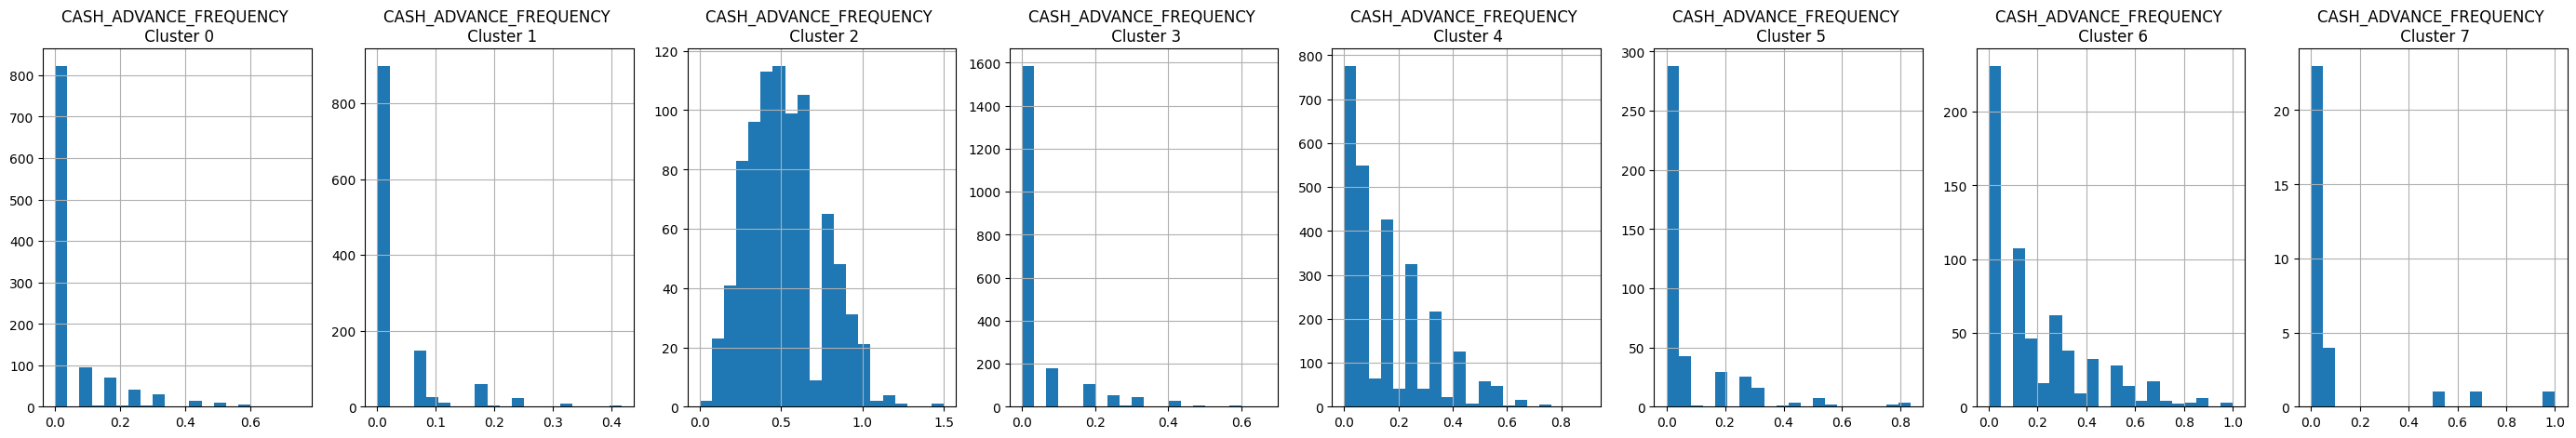

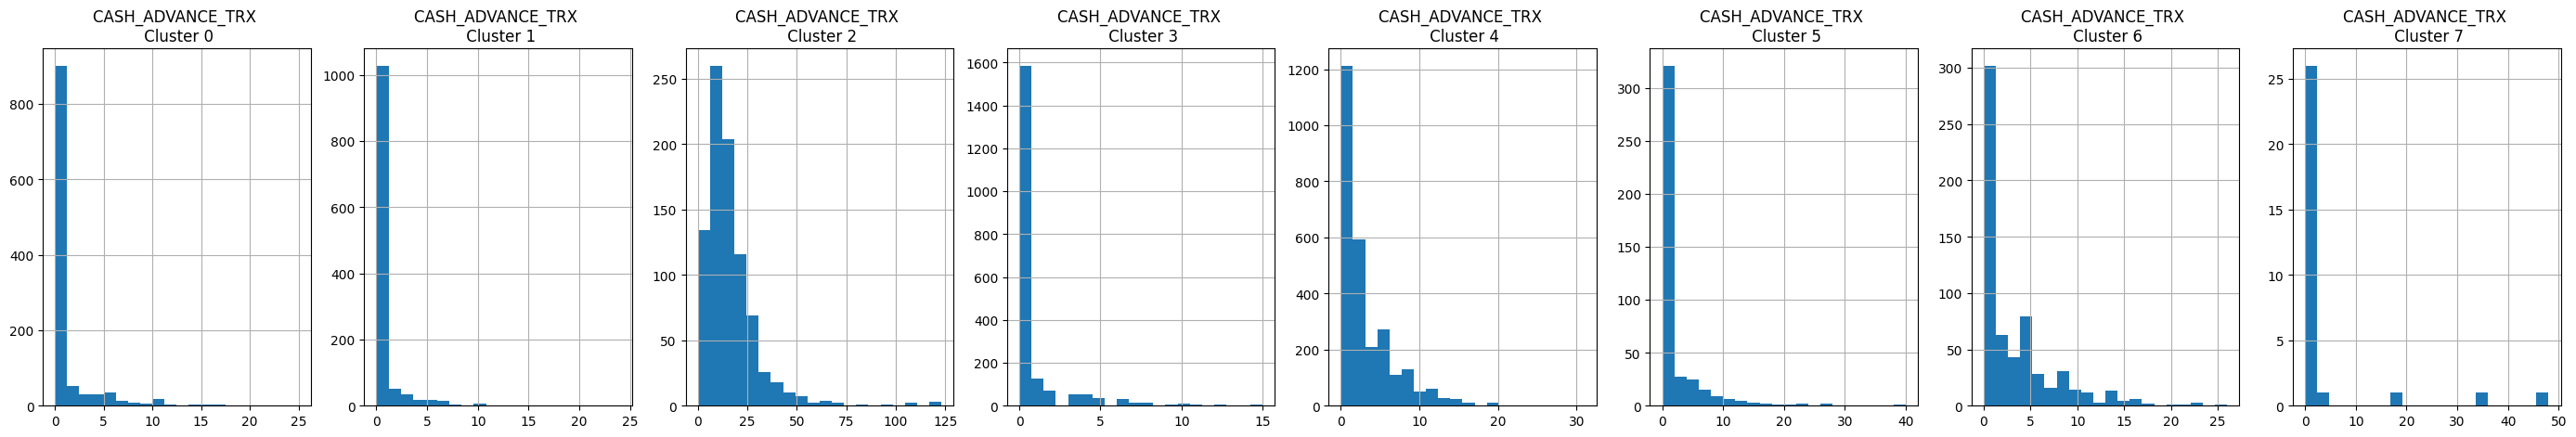

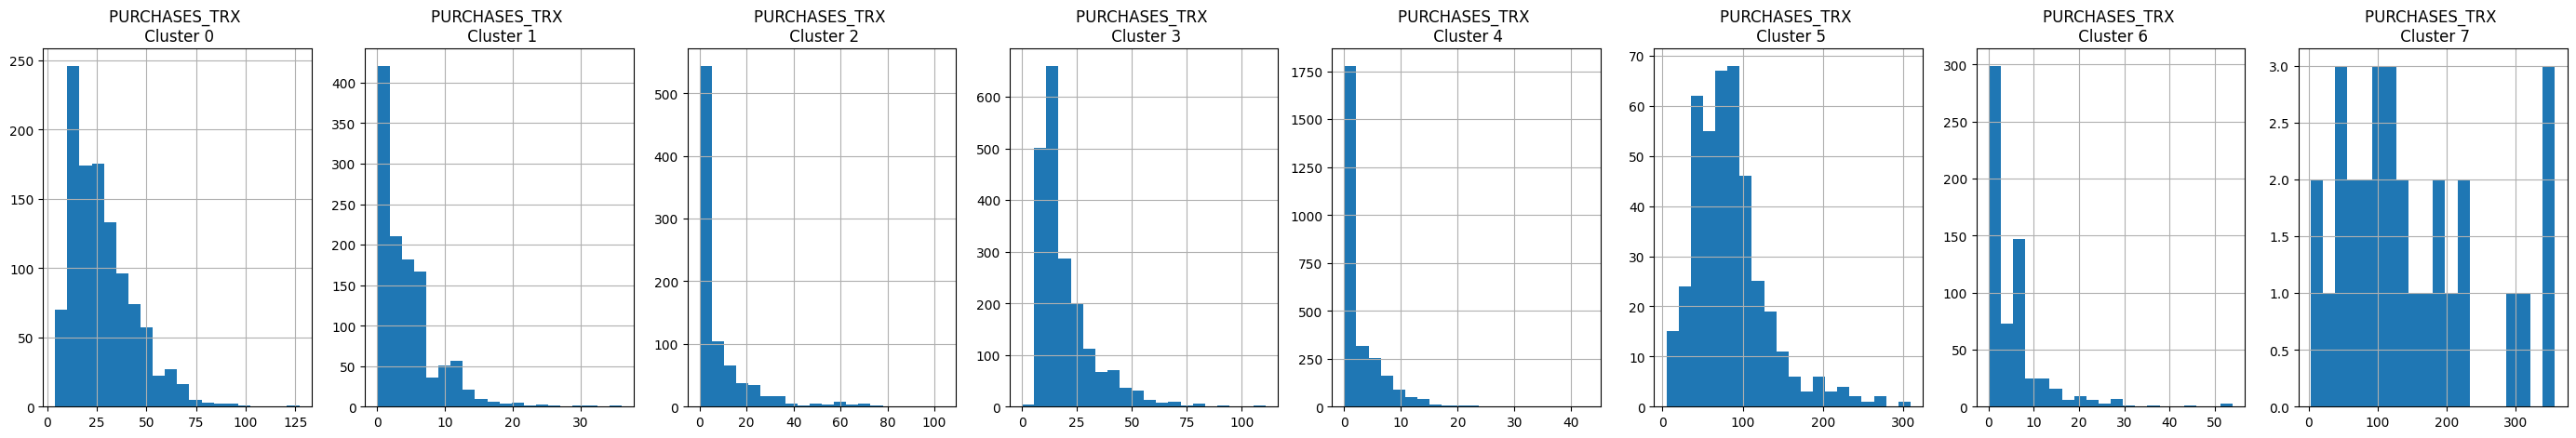

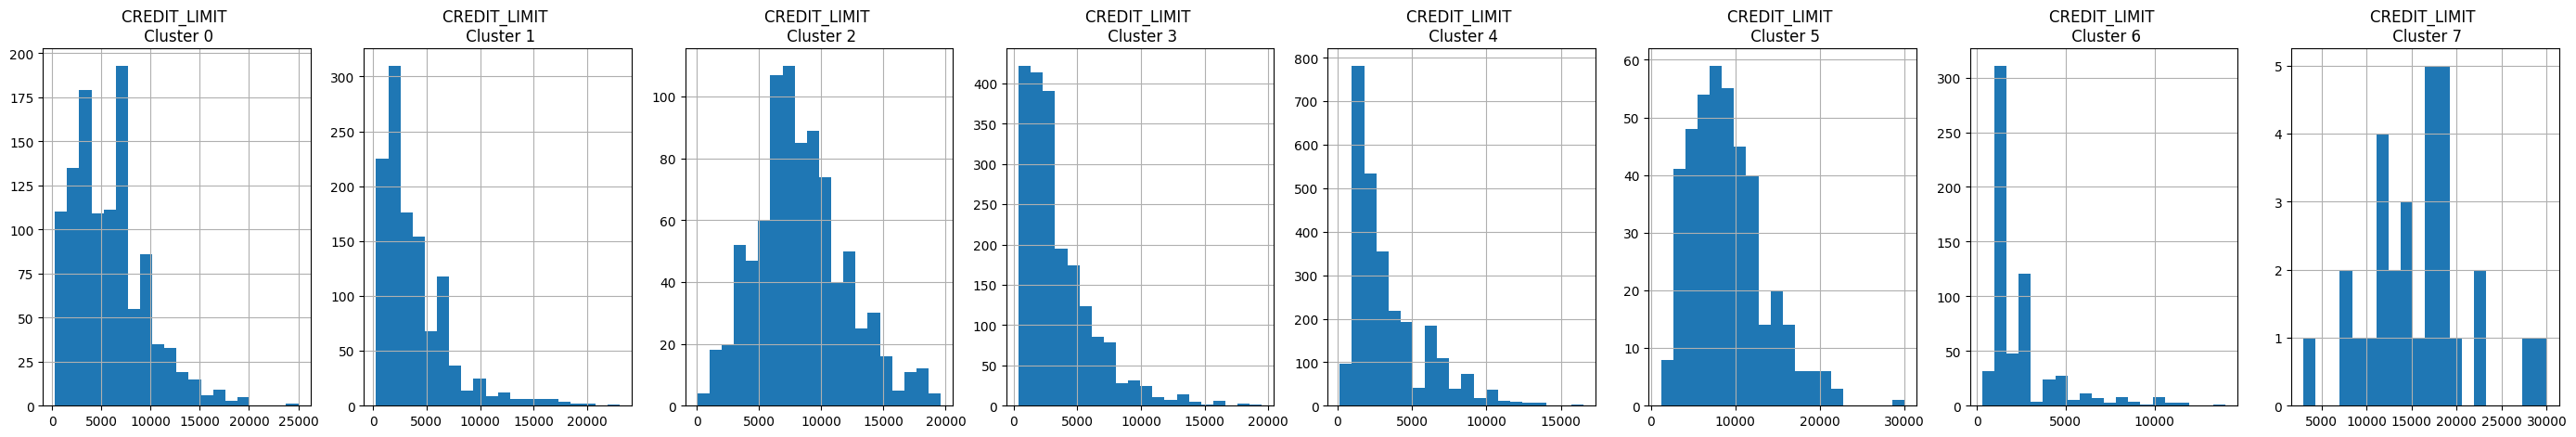

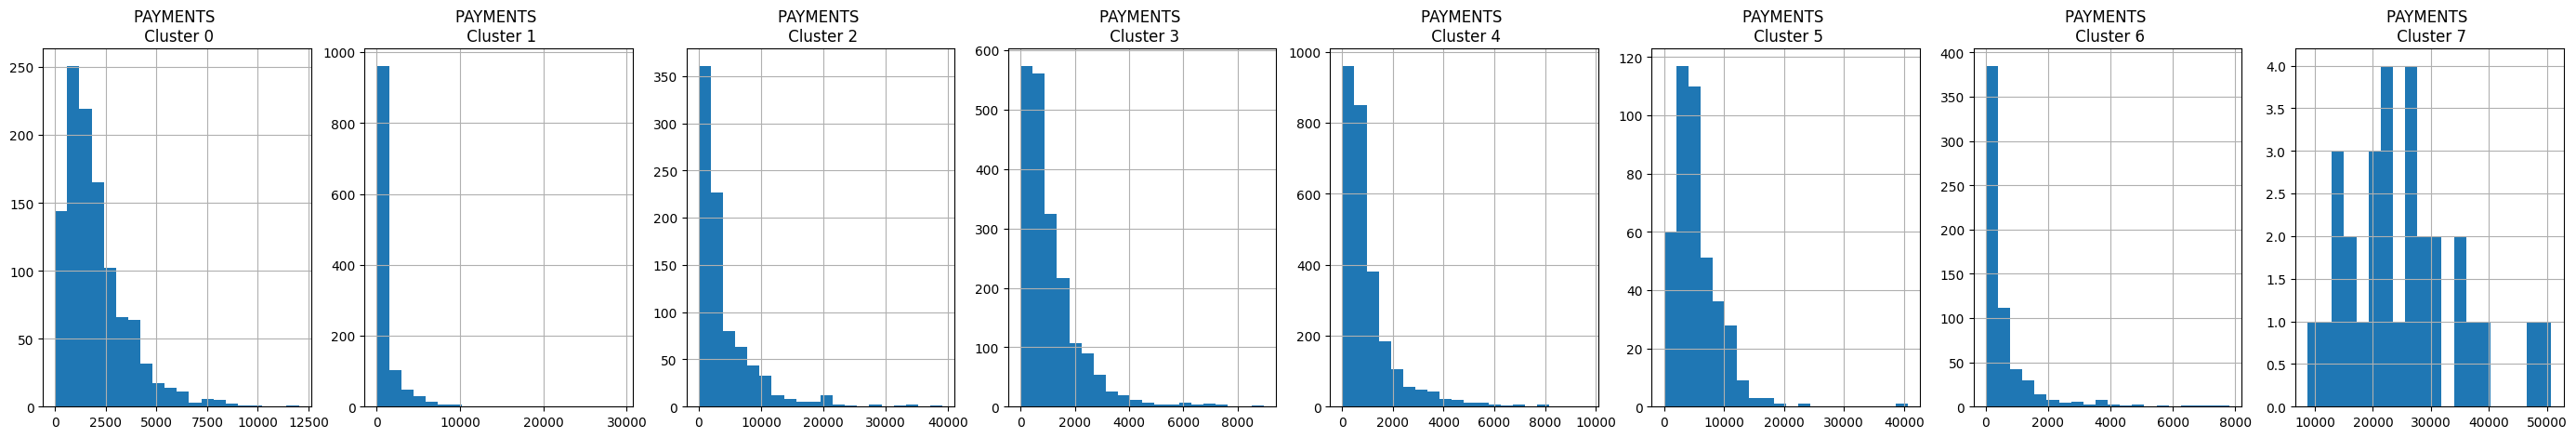

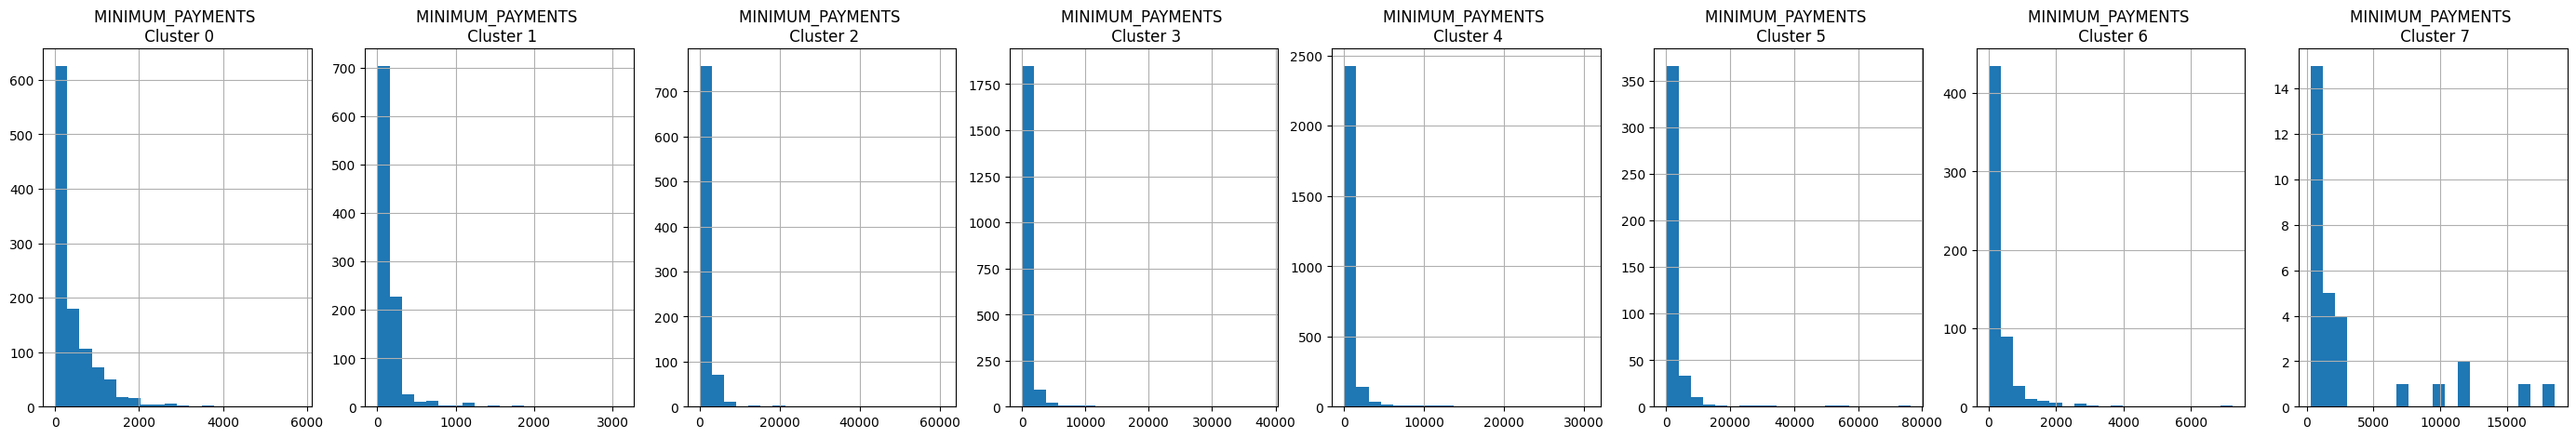

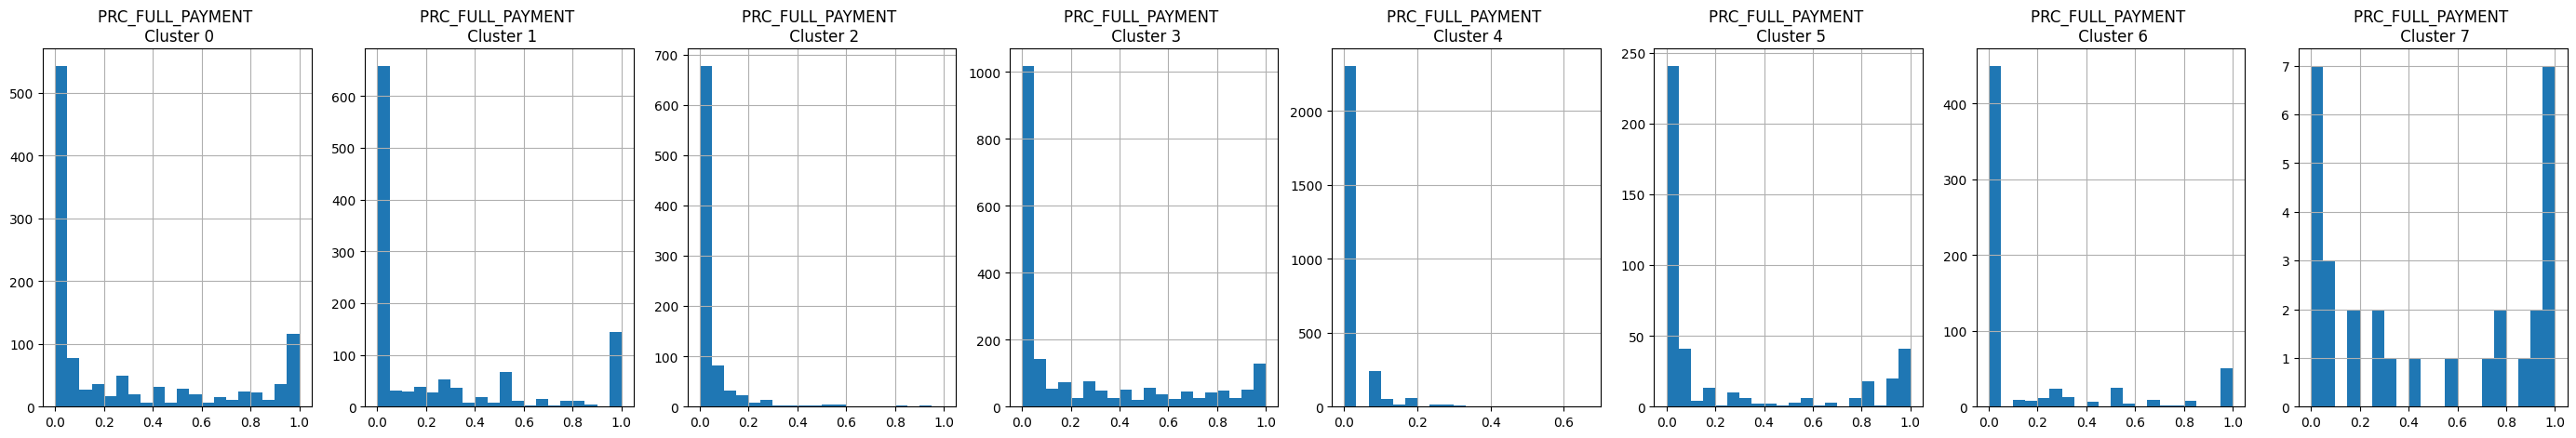

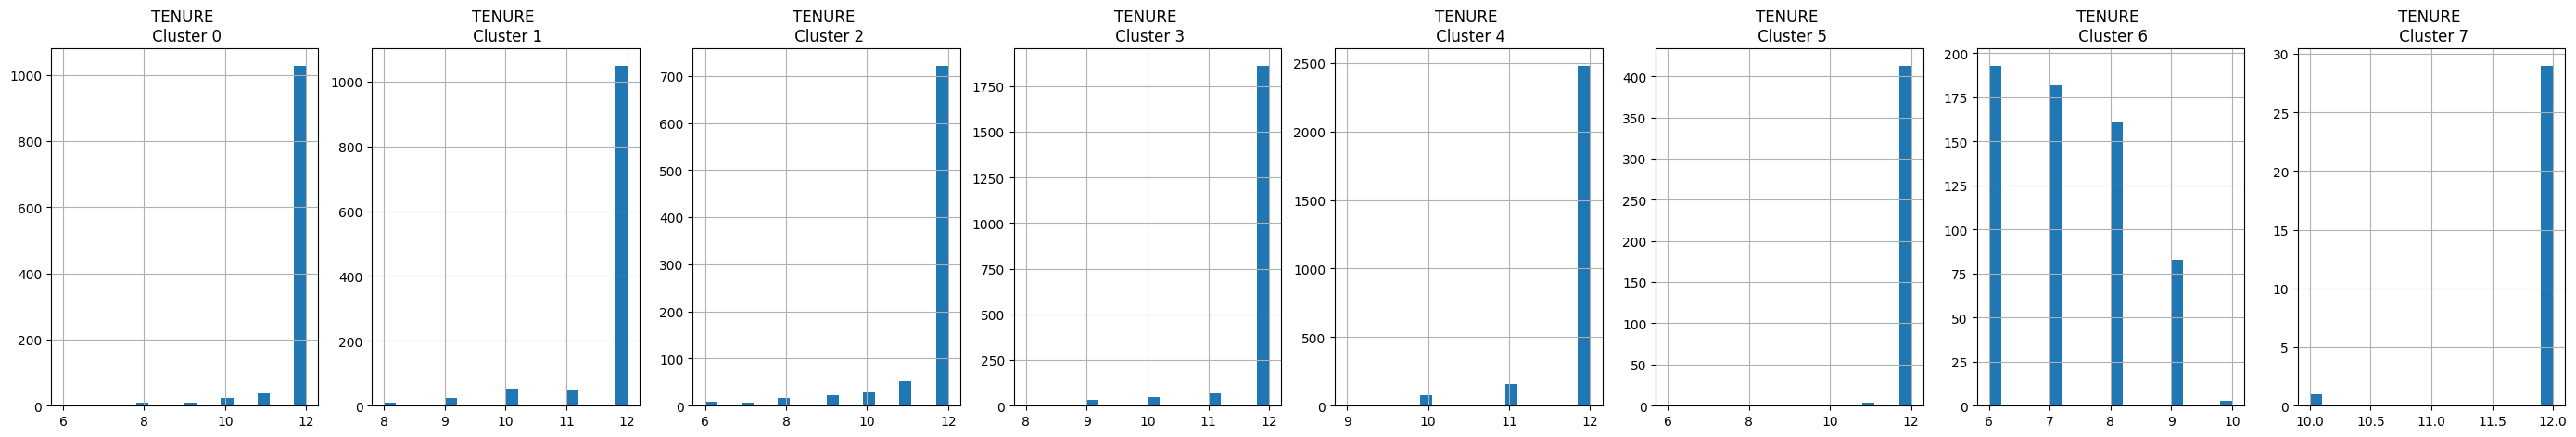

In [83]:
# Tracer l'histogramme de divers clusters

for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \n Cluster {}'.format(i,j))
    
plt.show


### APPLIQUONS L'ANALYSE EN COMPOSANTES PRINCIPALES `(PCA)` ET VISUALISONS LES RÉSULTATS

#### L'analyse en composante principale ou `PCA` (Principal component analysis) est une méthode de réduction de dimension, largement utilisée en statistique descriptive, pour visualiser sur  un graphique à 2 ou 3 dimensions des données décrites sur plus de dimensions.

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [85]:
### Obtenir les composants principaux

pca = PCA(n_components=2)

principal_component = pca.fit_transform(creditcard_df_scaled)

principal_component

array([[-1.68222016, -1.07644772],
       [-1.13829533,  2.50647132],
       [ 0.96968364, -0.38354568],
       ...,
       [-0.92620329, -1.81077867],
       [-2.33655117, -0.65794827],
       [-0.55642236, -0.40047183]])

In [86]:
# Créer un dataframe avec les deux composants


pca_df = pd.DataFrame(data = principal_component, columns= ['pca1', 'pca2'])
pca_df.head

<bound method NDFrame.head of           pca1      pca2
0    -1.682220 -1.076448
1    -1.138295  2.506471
2     0.969684 -0.383546
3    -0.873628  0.043168
4    -1.599434 -0.688577
...        ...       ...
8945 -0.359629 -2.016140
8946 -0.564369 -1.639108
8947 -0.926203 -1.810779
8948 -2.336551 -0.657948
8949 -0.556422 -0.400472

[8950 rows x 2 columns]>

In [88]:
# concaténer les étiquettes des clusters à notre dataframe 

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()


,pca1,pca2,cluster
0,-1.682220,-1.076448,4
1,-1.138295,2.506471,2
2,0.969684,-0.383546,0
3,-0.873628,0.043168,4
4,-1.599434,-0.688577,4


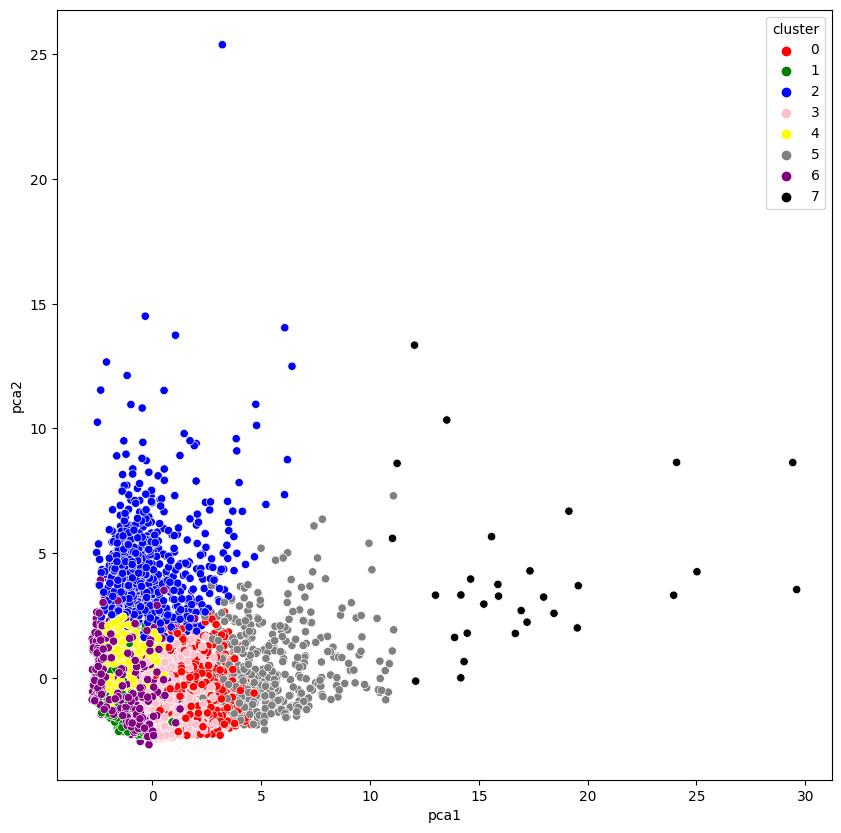

In [89]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y= 'pca2', hue= 'cluster', data=pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

### COMPRENDRE LA THÉORIE ET ​​L'INTUITION DERRIÈRE AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

###  APPLIQUER LES AUTOENCODERS AUTOMATIQUES (EFFECTUER LA RÉDUCTION DE DIMENSIONNALITÉ)

In [90]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD



2022-10-20 14:35:59.468994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [92]:
encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - utilisé pour notre réduction de dimension
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

2022-10-20 14:53:03.810180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [93]:
creditcard_df_scaled.shape

(8950, 17)

In [94]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 16ms/step - loss: 0.5152
Epoch 2/25
70/70 [==============================] - 1s 14ms/step - loss: 0.2811
Epoch 3/25
70/70 [==============================] - 1s 15ms/step - loss: 0.2329
Epoch 4/25
70/70 [==============================] - 1s 16ms/step - loss: 0.1939
Epoch 5/25
70/70 [==============================] - 1s 15ms/step - loss: 0.1819
Epoch 6/25
70/70 [==============================] - 1s 15ms/step - loss: 0.1521
Epoch 7/25
70/70 [==============================] - 1s 15ms/step - loss: 0.1391
Epoch 8/25
70/70 [==============================] - 1s 15ms/step - loss: 0.1197
Epoch 9/25
70/70 [==============================] - 1s 15ms/step - loss: 0.1138
Epoch 10/25
70/70 [==============================] - 1s 15ms/step - loss: 0.1060
Epoch 11/25
70/70 [==============================] - 1s 14ms/step - loss: 0.0982
Epoch 12/25
70/70 [==============================] - 1s 15ms/step - loss: 0.0942
Epoch 13/25
70/70 [==================

In [96]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [97]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 2ms/step


In [98]:
pred.shape

(8950, 10)

In [ ]:
# Numbre optimal de clusters
#kmeans# PCA

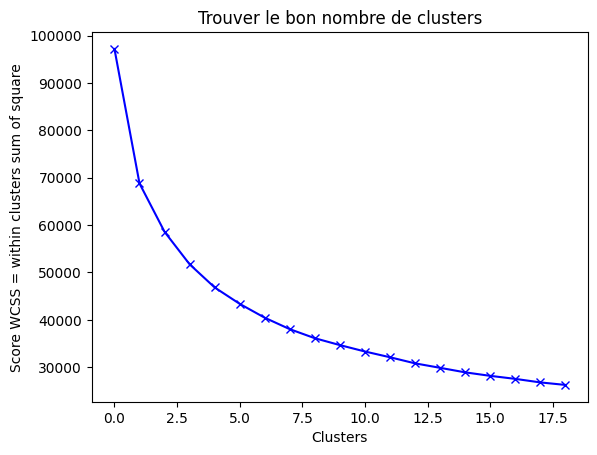

In [101]:
score_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    score_2.append(kmeans.inertia_)


plt.plot(score_2, 'bx-')
plt.title('Trouver le bon nombre de clusters')
plt.xlabel('Clusters')
plt.ylabel('Score WCSS = within clusters sum of square')
plt.show()

/var/folders/mw/yz61wp355js66413m1cxbhgr0000gn/T/ipykernel_10475/1285405526.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score_1, 'bx-', color ='r')
/var/folders/mw/yz61wp355js66413m1cxbhgr0000gn/T/ipykernel_10475/1285405526.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score_2, 'bx-', color ='g')


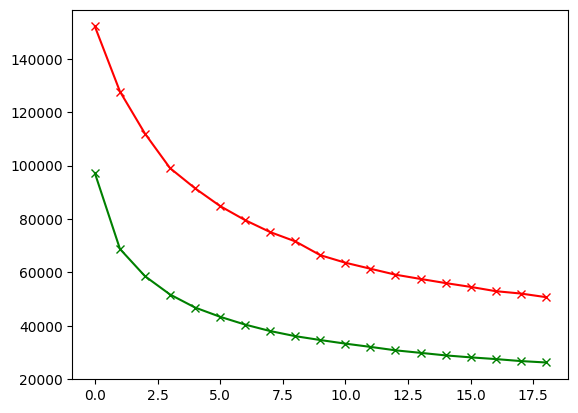

In [104]:
plt.plot(score_1, 'bx-', color ='r')
plt.plot(score_2, 'bx-', color ='g')

In [105]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [106]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [107]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.126328,0.002482
1,2.480968,-2.009444
2,1.126022,0.789502
3,-0.595432,-0.451416
4,-1.885410,-0.074440


In [108]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.126328,0.002482,1
1,2.480968,-2.009444,2
2,1.126022,0.789502,0
3,-0.595432,-0.451416,1
4,-1.885410,-0.074440,1


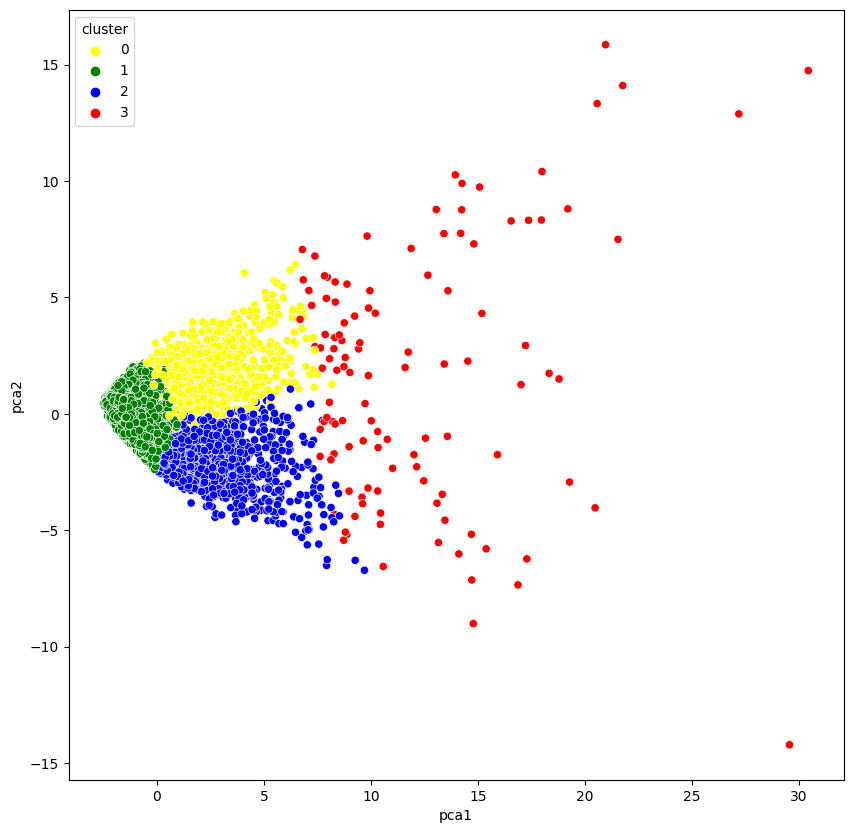

In [110]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['yellow','green','blue','red'])
plt.show()